In [129]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

In [130]:
temps = pd.read_csv("Data/city_temperature.csv")

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
temps.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [132]:
temps["Region"].value_counts()

North America                        1556681
Europe                                381990
Asia                                  316663
Africa                                251118
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: Region, dtype: int64

In [133]:
# Take a slice of the data to reduce size of working data
tx_temps = temps[temps["State"] == "Texas"]
print(tx_temps.shape)
tx_temps.head()

(129711, 8)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
2630854,North America,US,Texas,Abilene,1,1,1995,33.4
2630855,North America,US,Texas,Abilene,1,2,1995,31.1
2630856,North America,US,Texas,Abilene,1,3,1995,33.6
2630857,North America,US,Texas,Abilene,1,4,1995,28.2
2630858,North America,US,Texas,Abilene,1,5,1995,29.5


In [134]:
tx_temps["City"].unique()

array(['Abilene', 'Amarillo', 'Austin', 'Brownsville', 'Corpus Christi',
       'Dallas Ft Worth', 'El Paso', 'Houston', 'Lubbock',
       'Midland Odessa', 'San Angelo', 'San Antonio', 'Waco',
       'Wichita Falls'], dtype=object)

In [146]:
# Reduce dataset to a few cities to keep things neat
populous_cities = ["Austin", "Houston", "San Antonio", "Dallas Fort Worth", "El Paso"]
print("Before trim: ", tx_temps.shape)
tx_cities = tx_temps[tx_temps["City"].isin(populous_cities)]
print("After trim: ", tx_cities.shape)

Before trim:  (129711, 8)
After trim:  (37060, 8)


In [147]:
# Get average, min, max temperature for each month for each major city
city_month_avg_temp = pd.DataFrame(tx_cities.groupby(["City","Month"]).mean()["AvgTemperature"].reset_index())
city_month_min_temp = pd.DataFrame(tx_cities.groupby(["City","Month"]).min()["AvgTemperature"].reset_index())
city_month_max_temp = pd.DataFrame(tx_cities.groupby(["City","Month"]).max()["AvgTemperature"].reset_index())

city_month_avg_temp["MinAvgTemperature"] = city_month_min_temp["AvgTemperature"]
city_month_avg_temp["MaxAvgTemperature"] = city_month_max_temp["AvgTemperature"]

city_month_temps = city_month_avg_temp
city_month_temps.head(15)

,City,Month,AvgTemperature,MinAvgTemperature,MaxAvgTemperature
0,Austin,1,50.525434,-99.0,74.3
1,Austin,2,54.537687,22.1,76.6
2,Austin,3,60.949007,-99.0,77.6
3,Austin,4,65.239744,-99.0,83.5
4,Austin,5,75.089340,-99.0,86.1
5,Austin,6,79.883867,-99.0,93.2
6,Austin,7,83.621419,72.9,92.3
7,Austin,8,83.779097,-99.0,94.5
8,Austin,9,78.529733,-99.0,92.9
9,Austin,10,69.438710,44.7,84.8


In [148]:
# "-99.0"? That doesn't look right. Let's see how many records have this temperature
tx_cities[tx_cities["AvgTemperature"] == tx_cities["AvgTemperature"].min()]

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2649847,North America,US,Texas,Austin,4,7,1996,-99.0
2649848,North America,US,Texas,Austin,4,8,1996,-99.0
2649849,North America,US,Texas,Austin,4,9,1996,-99.0
2649850,North America,US,Texas,Austin,4,10,1996,-99.0
2649851,North America,US,Texas,Austin,4,11,1996,-99.0
...,...,...,...,...,...,...,...,...
2735751,North America,US,Texas,San Antonio,3,1,2003,-99.0
2737392,North America,US,Texas,San Antonio,8,28,2007,-99.0
2737748,North America,US,Texas,San Antonio,8,18,2008,-99.0
2737785,North America,US,Texas,San Antonio,9,24,2008,-99.0


In [149]:
# Those seem erroneous, so we'll remove them.
print("Before trimming -99.0 temps: ", tx_cities.shape)
tx_cities = tx_cities[tx_cities["AvgTemperature"] > -99.0]
print("After trimming -99.0 temps: ", tx_cities.shape)

Before trimming -99.0 temps:  (37060, 8)
After trimming -99.0 temps:  (36969, 8)


In [150]:
# Try again to create a summary of avg, max, and min temps per city per month
city_month_avg_temp = pd.DataFrame(tx_cities.groupby(["City","Month"]).mean()["AvgTemperature"].reset_index())
city_month_min_temp = pd.DataFrame(tx_cities.groupby(["City","Month"]).min()["AvgTemperature"].reset_index())
city_month_max_temp = pd.DataFrame(tx_cities.groupby(["City","Month"]).max()["AvgTemperature"].reset_index())

city_month_avg_temp["MinAvgTemperature"] = city_month_min_temp["AvgTemperature"]
city_month_avg_temp["MaxAvgTemperature"] = city_month_max_temp["AvgTemperature"]

city_month_temps = city_month_avg_temp
city_month_temps.head(15)

,City,Month,AvgTemperature,MinAvgTemperature,MaxAvgTemperature
0,Austin,1,50.711180,23.1,74.3
1,Austin,2,54.537687,22.1,76.6
2,Austin,3,61.147702,30.8,77.6
3,Austin,4,68.241514,39.3,83.5
4,Austin,5,75.532316,53.5,86.1
5,Austin,6,81.569179,70.7,93.2
6,Austin,7,83.621419,72.9,92.3
7,Austin,8,84.252005,70.6,94.5
8,Austin,9,78.766756,56.2,92.9
9,Austin,10,69.438710,44.7,84.8


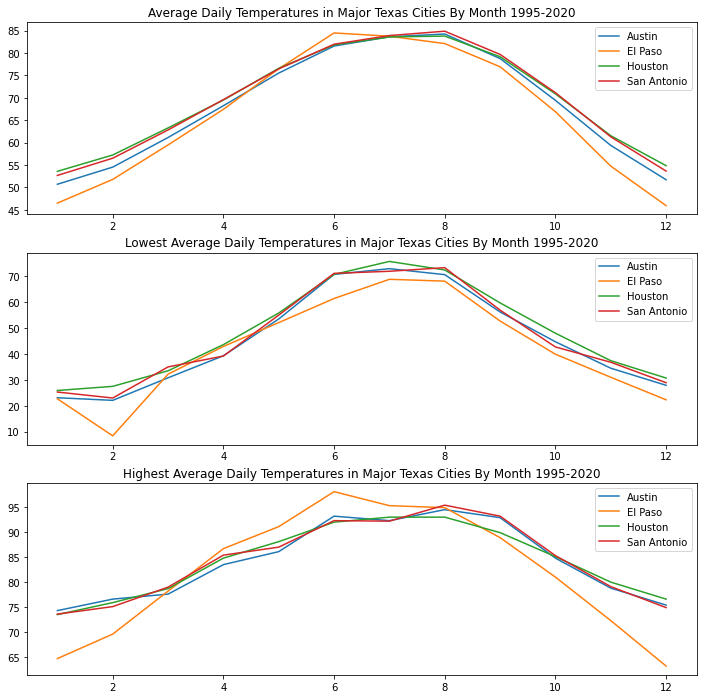

In [153]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,12))

for city in city_month_avg_temp["City"].unique():
    plot_df = city_month_avg_temp[city_month_avg_temp["City"] == city]
    ax1.plot(plot_df["Month"], plot_df["AvgTemperature"])
ax1.legend(city_month_avg_temp["City"].unique())
ax1.set(title ="Average Daily Temperatures in Major Texas Cities By Month 1995-2020")

for city in city_month_avg_temp["City"].unique():
    plot_df = city_month_avg_temp[city_month_avg_temp["City"] == city]
    ax2.plot(plot_df["Month"], plot_df["MinAvgTemperature"])
ax2.legend(city_month_avg_temp["City"].unique())
ax2.set(title ="Lowest Average Daily Temperatures in Major Texas Cities By Month 1995-2020")

for city in city_month_avg_temp["City"].unique():
    plot_df = city_month_avg_temp[city_month_avg_temp["City"] == city]
    ax3.plot(plot_df["Month"], plot_df["MaxAvgTemperature"])
ax3.legend(city_month_avg_temp["City"].unique())
ax3.set(title ="Highest Average Daily Temperatures in Major Texas Cities By Month 1995-2020")

plt.show()

In [141]:
# Check if Corpus Christi has highest December avg temp
city_month_avg_temp[city_month_avg_temp["Month"] == 12].sort_values(by="AvgTemperature", ascending = False)

,City,Month,AvgTemperature,MinAvgTemperature,MaxAvgTemperature
23,Corpus Christi,12,59.016602,30.1,76.8
47,Houston,12,54.856939,30.7,76.6
59,San Antonio,12,53.652010,28.9,74.9
11,Austin,12,51.718547,27.9,75.4
71,Waco,12,49.047211,25.6,72.6
35,El Paso,12,45.942283,22.3,63.2
